In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x17140bd8550>,
 'caps': [<matplotlib.lines.Line2D at 0x17140bb5d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x17140bb42d0>],
 'medians': [<matplotlib.lines.Line2D at 0x17140bd8910>],
 'fliers': [<matplotlib.lines.Line2D at 0x17140bd8a50>],
 'means': []}

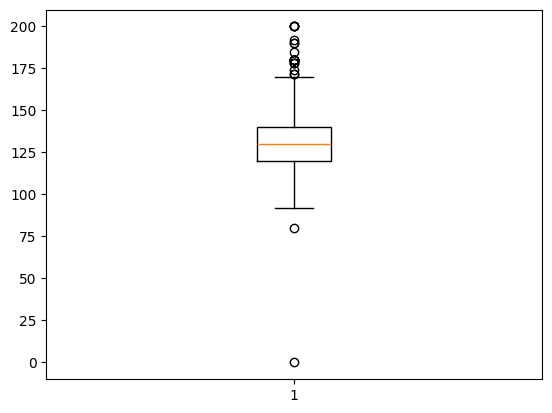

In [8]:
plt.boxplot(df["RestingBP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17140c8ad50>,
 'caps': [<matplotlib.lines.Line2D at 0x17140c8afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17140c8ac10>],
 'medians': [<matplotlib.lines.Line2D at 0x17140c8b250>],
 'fliers': [<matplotlib.lines.Line2D at 0x17140c8b390>],
 'means': []}

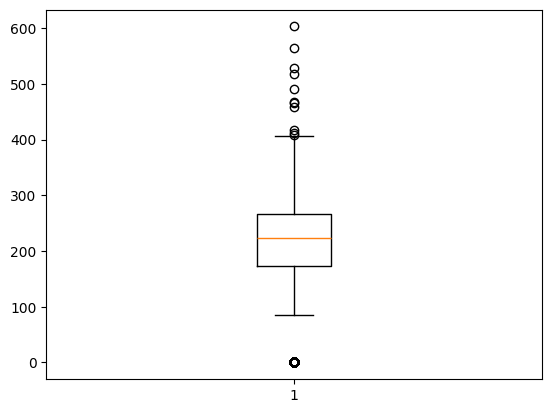

In [9]:
plt.boxplot(df["Cholesterol"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17140ceefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17140cef250>,
 'boxes': [<matplotlib.lines.Line2D at 0x17140ceee90>],
 'medians': [<matplotlib.lines.Line2D at 0x17140cef4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17140cef610>],
 'means': []}

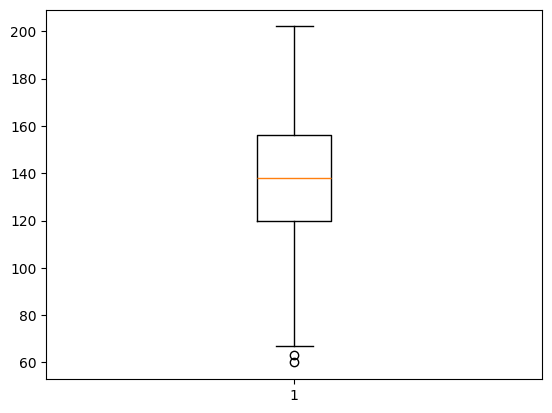

In [10]:
plt.boxplot(df["MaxHR"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17140d5f250>,
 'caps': [<matplotlib.lines.Line2D at 0x17140d5f4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17140d5f110>],
 'medians': [<matplotlib.lines.Line2D at 0x17140d5f750>],
 'fliers': [<matplotlib.lines.Line2D at 0x17140d5f890>],
 'means': []}

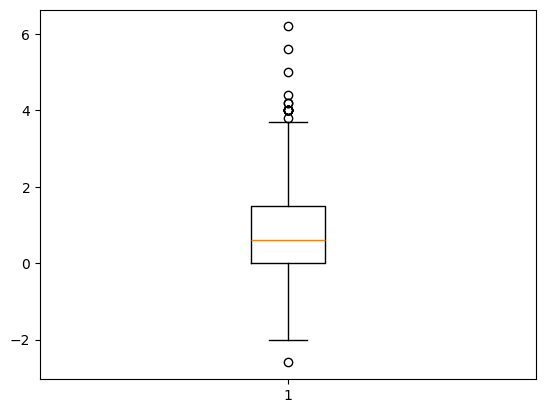

In [11]:
plt.boxplot(df["Oldpeak"])

In [12]:
df["Cholesterol"]

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])


In [14]:
remove_outliers(df,["Cholesterol"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17142e0dbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17142e0de50>,
 'boxes': [<matplotlib.lines.Line2D at 0x17142e0da90>],
 'medians': [<matplotlib.lines.Line2D at 0x17142e0e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17142e0e210>],
 'means': []}

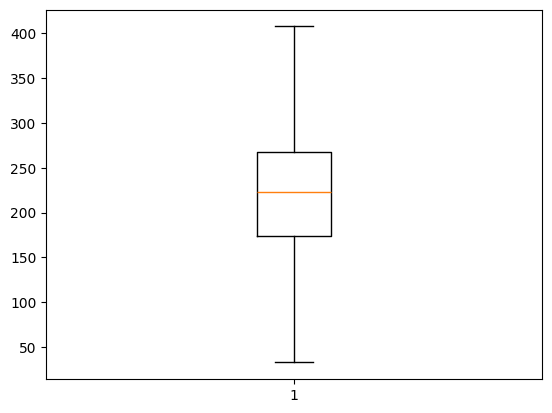

In [15]:
plt.boxplot(df["Cholesterol"])

In [16]:
remove_outliers(df,["RestingBP"])
remove_outliers(df,["Oldpeak"])
remove_outliers(df,["MaxHR"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17142e81bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17142e81e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x17142e81a90>],
 'medians': [<matplotlib.lines.Line2D at 0x17142e820d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17142e82210>],
 'means': []}

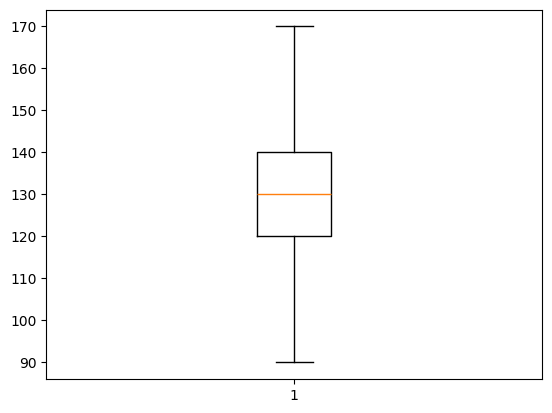

In [17]:
plt.boxplot(df["RestingBP"])

(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

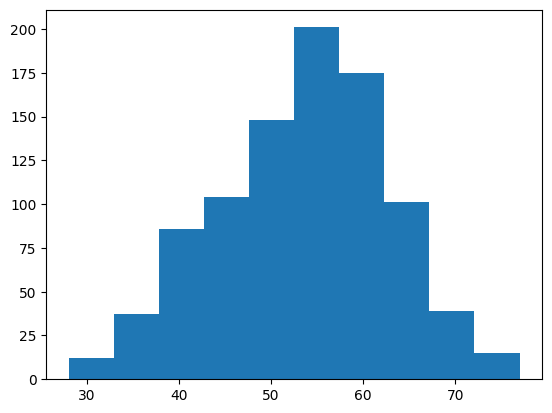

In [18]:
plt.hist(df.Age)

<Axes: xlabel='ChestPainType', ylabel='Count'>

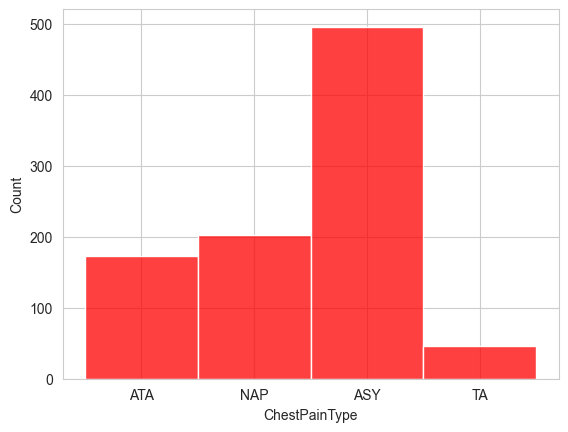

In [19]:
sns.set_style('whitegrid')
sns.histplot(df['ChestPainType'],color ='red', bins = 10)

(array([552.,   0.,   0.,   0.,   0., 178.,   0.,   0.,   0., 188.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

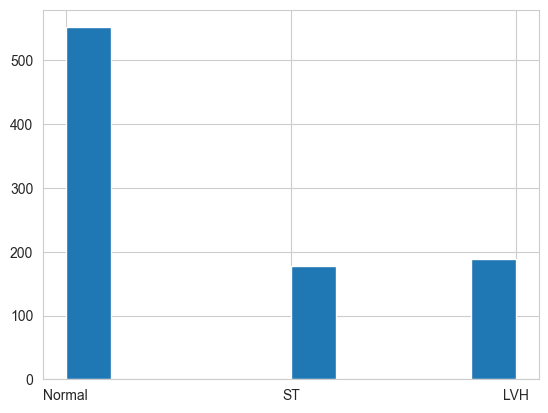

In [20]:
plt.hist(df.RestingECG)

In [21]:
fig = px.pie(df, names='Sex')
fig.show()

In [22]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [23]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [24]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [25]:
df["ChestPainType"] = df["ChestPainType"].map({'ASY': 0 ,'NAP': 1, 'ATA':2,'TA':3})

In [26]:
df["Sex"] = df["Sex"].map({'M': 1 ,'F': 0})

In [27]:
df["RestingECG"] = df["RestingECG"].map({'Normal': 0 ,'ST': 1, 'LVH':2})

In [28]:
df["ExerciseAngina"].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [29]:
df["ExerciseAngina"] = df["ExerciseAngina"].map({'N': 0 ,'Y': 1})

In [30]:
df["ST_Slope"].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [31]:
df["ST_Slope"] = df["ST_Slope"].map({'Flat': 0 ,'Up': 1,'Down':2})

In [32]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49,0,1,160.0,180.0,0,0,156.0,0,1.0,0,1
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48,0,0,138.0,214.0,0,0,108.0,1,1.5,0,1
4,54,1,1,150.0,195.0,0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110.0,264.0,0,0,132.0,0,1.2,0,1
914,68,1,0,144.0,193.0,1,0,141.0,0,3.4,0,1
915,57,1,0,130.0,131.0,0,0,115.0,1,1.2,0,1
916,57,0,2,130.0,236.0,0,2,174.0,0,0.0,0,1


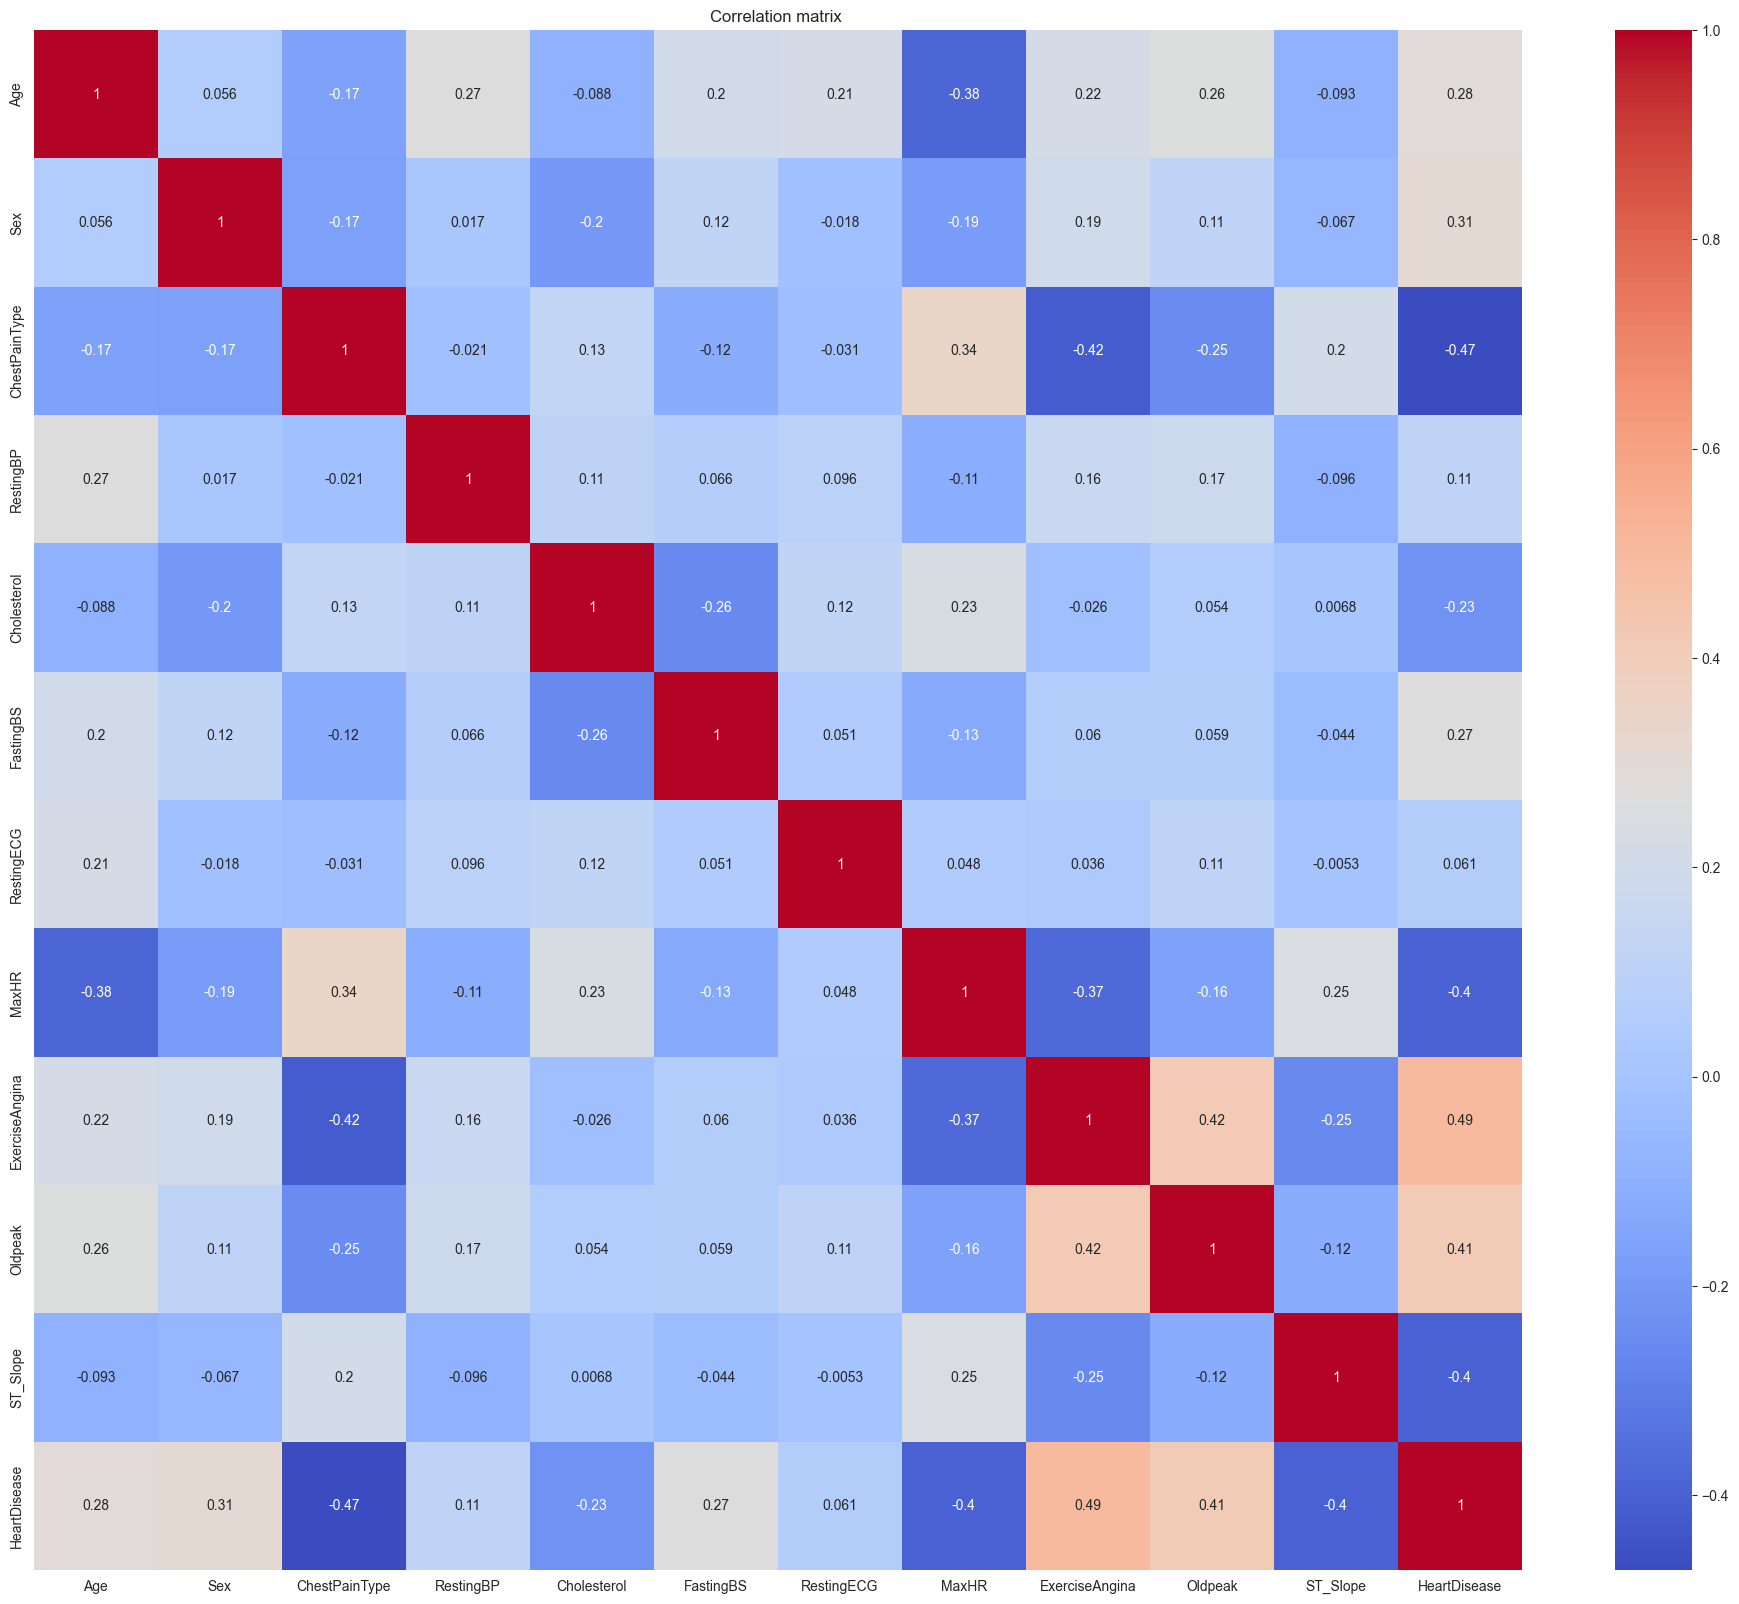

In [33]:
corr = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation matrix ")
plt.show()

In [34]:
threshold = 0.01
high_corr_features = corr.index[abs(corr["HeartDisease"]) > threshold].tolist()
high_corr_features.remove("HeartDisease")
print("Selected features based on correlation with target:")
print(high_corr_features)

X_selected = df[high_corr_features]
y = df["HeartDisease"]

Selected features based on correlation with target:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [35]:
X_selected

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1
1,49,0,1,160.0,180.0,0,0,156.0,0,1.0,0
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1
3,48,0,0,138.0,214.0,0,0,108.0,1,1.5,0
4,54,1,1,150.0,195.0,0,0,122.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110.0,264.0,0,0,132.0,0,1.2,0
914,68,1,0,144.0,193.0,1,0,141.0,0,3.4,0
915,57,1,0,130.0,131.0,0,0,115.0,1,1.2,0
916,57,0,2,130.0,236.0,0,2,174.0,0,0.0,0


In [36]:
X_selected_train,X_selected_test,y_train,y_test = train_test_split(X_selected,y, test_size = 0.3 , random_state = 42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected_train)
X_test_scaled = scaler.transform(X_selected_test)

In [38]:
model_L = LogisticRegression()
model_L.fit(X_train_scaled , y_train)

LogisticRegression()

In [39]:
model_L.score(X_train_scaled,y_train)

0.8489096573208723

In [40]:
y_pred= model_L.predict(X_test_scaled)

In [41]:
accuracy_score(y_test , y_pred)

0.855072463768116

In [42]:
print(classification_report (y_test , y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       112
           1       0.92      0.82      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



In [43]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model
grid.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

# Evaluate the model on the test set
print("Test set score: ", grid.score(X_test_scaled, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [44]:
print("Test set score: ", grid.score(X_test_scaled, y_test))

Test set score:  0.8913043478260869


In [45]:
y_pred2 = grid.predict(X_test_scaled)

In [46]:
accuracy_score(y_test , y_pred2)

0.8913043478260869

In [47]:
accuracy=accuracy_score(y_pred, y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.0000

Confusion Matrix:
[[101  11]
 [ 29 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       112
           1       0.92      0.82      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



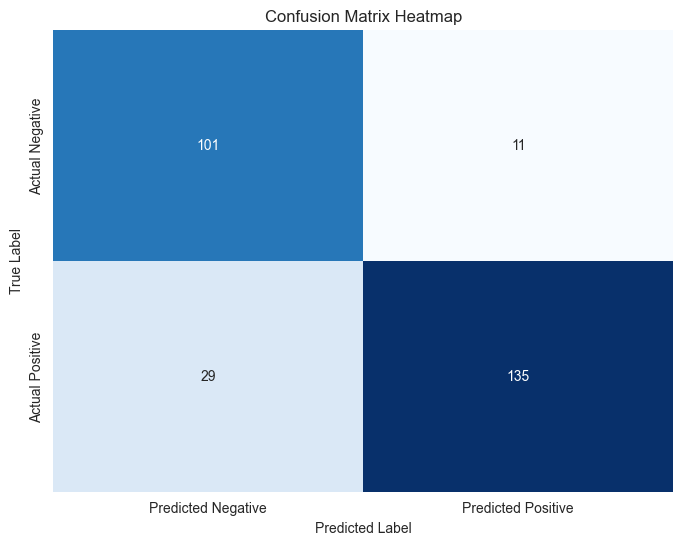

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [50]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [51]:
y_pred_knn = knn.predict(X_test_scaled)

In [52]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.04%


In [53]:
classification_report(y_test, y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86       112\n           1       0.92      0.87      0.90       164\n\n    accuracy                           0.88       276\n   macro avg       0.87      0.88      0.88       276\nweighted avg       0.88      0.88      0.88       276\n'

In [54]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [55]:
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred4 = rf_classifier.predict(X_test_scaled)

In [57]:
accuracy = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.41%


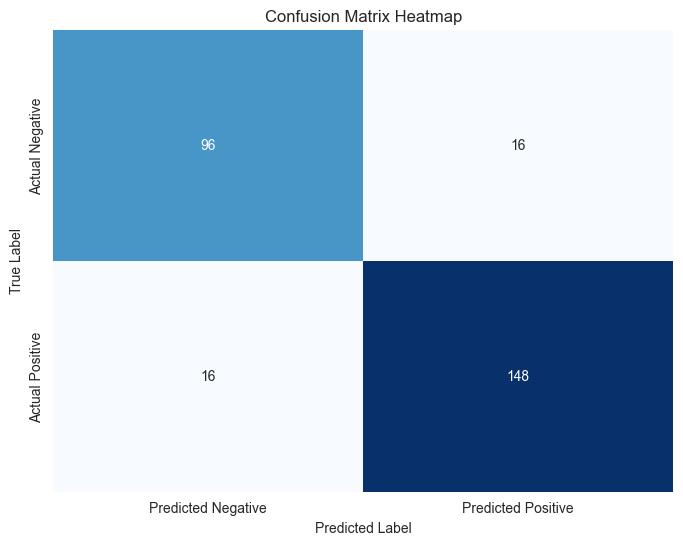

In [58]:
# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred4)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
import joblib

X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simpan scaler ke file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [60]:
import numpy as np
import joblib

# Load model dan scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

# Masukkan input manual sesuai form HTML
input_manual = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2]])
input_scaled = scaler.transform(input_manual)

# Prediksi probabilitas
prob = model.predict_proba(input_scaled)[0][1]
print(f"Probabilitas penyakit jantung: {prob * 100:.2f}%")

Probabilitas penyakit jantung: 62.00%


In [67]:
input_manual_sehat = np.array([[29,   # Age (muda)
                          0,    # Sex: Female
                          2,    # ChestPainType: Non-Anginal Pain
                          110,  # RestingBP: normal
                          180,  # Cholesterol: normal
                          0,    # FastingBS: <120 mg/dl
                          0,    # RestingECG: Normal
                          172,  # MaxHR: tinggi
                          0,    # ExerciseAngina: No
                          0.0,  # Oldpeak: tidak ada depresi ST
                          0]])  # ST_Slope: Upsloping (normal)

input_scaled = scaler.transform(input_manual_sehat)

# Prediksi probabilitas
prob = model.predict_proba(input_scaled)[0][1]
print(f"Probabilitas penyakit jantung: {prob * 100:.2f}%")

Probabilitas penyakit jantung: 25.00%


In [68]:
df['Sex'].value_counts()

Sex
1    725
0    193
Name: count, dtype: int64

In [69]:
corr_sex_target = df[['Sex', 'HeartDisease']].corr()
print(corr_sex_target)

                   Sex  HeartDisease
Sex           1.000000      0.305445
HeartDisease  0.305445      1.000000


In [70]:
print(model_L.coef_)

[[ 0.14236231  0.45894945 -0.58818255  0.0223474  -0.37549188  0.48743766
   0.05806242 -0.20547322  0.57014144  0.7503147  -0.83404182]]


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Melatih Logistic Regression
model_L = LogisticRegression()
model_L.fit(X_train_scaled, y_train)
y_pred_L = model_L.predict(X_test_scaled)

# Melatih Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

# Melatih Support Vector Machine (SVM)
model_svm = SVC(probability=True)  # We need probability=True for ROC AUC
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)

# Fungsi untuk mengevaluasi model
def evaluate_model(y_true, y_pred, model, X_test_scaled):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, model.predict_proba(X_test_scaled)[:, 1])
    }

# Evaluasi model-model
results_L = evaluate_model(y_test, y_pred_L, model_L, X_test_scaled)
results_rf = evaluate_model(y_test, y_pred_rf, model_rf, X_test_scaled)
results_svm = evaluate_model(y_test, y_pred_svm, model_svm, X_test_scaled)

# Menampilkan hasil evaluasi
print("Logistic Regression Evaluation:", results_L)
print("Random Forest Evaluation:", results_rf)
print("SVM Evaluation:", results_svm)


Logistic Regression Evaluation: {'Accuracy': 0.855072463768116, 'Precision': 0.9246575342465754, 'Recall': 0.823170731707317, 'F1-Score': 0.8709677419354839, 'AUC': np.float64(0.9335256968641116)}
Random Forest Evaluation: {'Accuracy': 0.8840579710144928, 'Precision': 0.9230769230769231, 'Recall': 0.8780487804878049, 'F1-Score': 0.9, 'AUC': np.float64(0.9469457752613241)}
SVM Evaluation: {'Accuracy': 0.8913043478260869, 'Precision': 0.9036144578313253, 'Recall': 0.9146341463414634, 'F1-Score': 0.9090909090909091, 'AUC': np.float64(0.947081881533101)}


In [83]:
# Melatih model SVM
model_svm = SVC(probability=True)  # probability=True diperlukan untuk AUC
model_svm.fit(X_train_scaled, y_train)

# input_manual = np.array([[29,   # Age (muda)
#                           0,    # Sex: Male
#                           2,    # ChestPainType: Non-Anginal Pain
#                           110,  # RestingBP: normal
#                           180,  # Cholesterol: normal
#                           0,    # FastingBS: <120 mg/dl
#                           0,    # RestingECG: Normal
#                           172,  # MaxHR: tinggi
#                           0,    # ExerciseAngina: No
#                           0.0,  # Oldpeak: tidak ada depresi ST
#                           0]])  # ST_Slope: Upsloping (normal)

input_manual = np.array([[60,   # Age (lebih tua)
                                    1,    # Sex: Male
                                    3,    # ChestPainType: Typical Angina (indikasi masalah jantung)
                                    180,  # RestingBP: Tinggi (hipertensi)
                                    250,  # Cholesterol: Tinggi (hiperkolesterolemia)
                                    0,    # FastingBS: <120 mg/dl
                                    1,    # RestingECG: ST-T Wave abnormality (tanda masalah jantung)
                                    140,  # MaxHR: rendah (kurang aktif)
                                    1,    # ExerciseAngina: Yes (ada angina saat berolahraga)
                                    2.5,  # Oldpeak: Depression level tinggi (indikatir jantung tertekan)
                                    2]])  # ST_Slope: Downsloping (tanda keparahan penyakit jantung)

# Prediksi menggunakan model SVM
prediction = model_svm.predict(input_scaled)

# Menampilkan hasil prediksi
if prediction[0] == 1:
    print("Pasien diprediksi memiliki penyakit jantung.")
else:
    print("Pasien diprediksi tidak memiliki penyakit jantung.")

# Prediksi probabilitas
probabilitas = model_svm.predict_proba(input_scaled)[0][1]
print(f"Probabilitas penyakit jantung: {probabilitas * 100:.2f}%")

Pasien diprediksi tidak memiliki penyakit jantung.
Probabilitas penyakit jantung: 21.97%
